In [1]:
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

diabetes=load_diabetes()

diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

In [2]:
df_X=diabetes.data
df_y=diabetes.target

In [3]:
ddf = pd.DataFrame(data  = df_X, columns = diabetes.feature_names)

df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.
df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [4]:
print(df_X.shape)

(442, 10)


In [5]:
print(df_y.shape)

(442,)


입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
모델 함수를 구현해주세요.

In [6]:
X = np.array(df_X)
y = np.array(df_y)
W = np.random.rand(10)
b = np.random.rand()

In [7]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

손실함수를 MSE 함수로 정의해주세요.

In [8]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [9]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

기울기를 계산하는 gradient 함수를 구현해주세요.

In [10]:
def gradient(X, W, b, y):
    N = len(W)
    
    y_pred = model(X, W, b)

    dW = 1/N * 2 * X.T.dot(y_pred - y)

    db = 2 * (y_pred - y).mean()
    return dW, db

학습률, learning rate 를 설정해주세요
만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

In [11]:
LEARNING_RATE = 0.0001

In [12]:
losses = []

for i in range(1, 1001):
    dW, db = gradient(X, W, b, y)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X, W, b, y)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 28864.5856
Iteration 20 : Loss 28769.5244
Iteration 30 : Loss 28674.8338
Iteration 40 : Loss 28580.5126
Iteration 50 : Loss 28486.5591
Iteration 60 : Loss 28392.9721
Iteration 70 : Loss 28299.7499
Iteration 80 : Loss 28206.8912
Iteration 90 : Loss 28114.3945
Iteration 100 : Loss 28022.2584
Iteration 110 : Loss 27930.4814
Iteration 120 : Loss 27839.0622
Iteration 130 : Loss 27747.9993
Iteration 140 : Loss 27657.2913
Iteration 150 : Loss 27566.9369
Iteration 160 : Loss 27476.9345
Iteration 170 : Loss 27387.2828
Iteration 180 : Loss 27297.9805
Iteration 190 : Loss 27209.0261
Iteration 200 : Loss 27120.4183
Iteration 210 : Loss 27032.1557
Iteration 220 : Loss 26944.2368
Iteration 230 : Loss 26856.6605
Iteration 240 : Loss 26769.4253
Iteration 250 : Loss 26682.5298
Iteration 260 : Loss 26595.9727
Iteration 270 : Loss 26509.7527
Iteration 280 : Loss 26423.8685
Iteration 290 : Loss 26338.3186
Iteration 300 : Loss 26253.1019
Iteration 310 : Loss 26168.2169
Iteration 320 : L

정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = 0.3, random_state =23)

In [14]:
def regression_model(X,W,b) :
    y = np.dot(X,W) + b
    return y

In [15]:
test_prediction = regression_model(X_test,W,b)
final_loss = MSE(test_prediction, y_test)
final_loss

22358.947348492788

x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

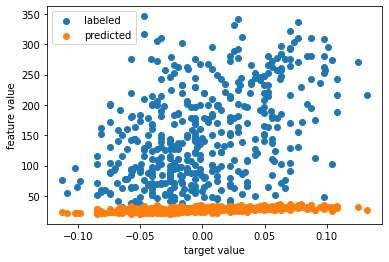

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(df_X[:,3], df_y, label= 'labeled')
plt.scatter(df_X[:,3], regression_model(df_X,W,b), label = 'predicted')
plt.ylabel('feature value')
plt.xlabel('target value')
plt.legend()

plt.show()

In [17]:
'''reference: https://yhyun225.tistory.com/11 \n https://github.com/seuyon0101/aiffel/blob/master/%5BE-02%5Dregression.ipynb'''

'reference: https://yhyun225.tistory.com/11 \n https://github.com/seuyon0101/aiffel/blob/master/%5BE-02%5Dregression.ipynb'

pj 1까지 밖에 못하긴 했지만 많은 레퍼런스를 보며 아직 코드를 보며 성장하는 중입니다. 어렵다는 말보다는 아직 데이터를 처리하는 법을 모르고 데이터를 어떻게 다뤄야 할지 모르다 보니 제가 뽑아낸 결과 역시 어떻게 평가해야할 지 모르겠네요... loss 값을 보니 3000이하라는 것에 성공적이라고 reference의 저자가 말해주네요.